Подключение зависимостей

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from keras.api.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense

Определение констант

In [7]:
IMG_WIDTH = 256
IMG_HEIGHT = 256
image_size = (IMG_WIDTH, IMG_HEIGHT)
input_shape = (IMG_WIDTH, IMG_HEIGHT, 3)
BATCH_SIZE = 16
EPOCHS = 15

Создание генератора изображений

In [8]:
datagen = ImageDataGenerator(rescale=1./255)

train_set = datagen.flow_from_directory(
    'data/train',
    target_size=image_size,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

validation_set = datagen.flow_from_directory(
    'data/val',
    target_size=image_size,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 1523 images belonging to 2 classes.
Found 282 images belonging to 2 classes.


Создание сверточной нейронной сети

In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/home/rinat/oirs/bot/.venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Обучение модели

In [10]:
model.fit(
    train_set,
    epochs=EPOCHS,
    validation_data=validation_set
)

# model.save('model.h5')

Epoch 1/15


/home/rinat/oirs/bot/.venv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.5757 - loss: 0.6635 - val_accuracy: 0.8794 - val_loss: 0.3046
Epoch 2/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 178s 1s/step - accuracy: 0.8563 - loss: 0.3545 - val_accuracy: 0.8972 - val_loss: 0.2505
Epoch 3/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - accuracy: 0.8863 - loss: 0.2767 - val_accuracy: 0.9149 - val_loss: 0.2679
Epoch 4/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.8976 - loss: 0.2407 - val_accuracy: 0.8972 - val_loss: 0.3142
Epoch 5/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.9060 - loss: 0.2350 - val_accuracy: 0.8972 - val_loss: 0.2684
Epoch 6/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - accuracy: 0.9272 - loss: 0.2051 - val_accuracy: 0.9184 - val_loss: 0.2619
Epoch 7/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - accuracy: 0.9383 - loss: 0.1771 - val_accuracy: 0.9184 - val_loss: 0.2322
Epoch 8/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - accuracy: 0.9432 - loss: 0.1568 - val_accuracy: 0.9043 - val_loss: 0.

Построение графиков потерь и качества

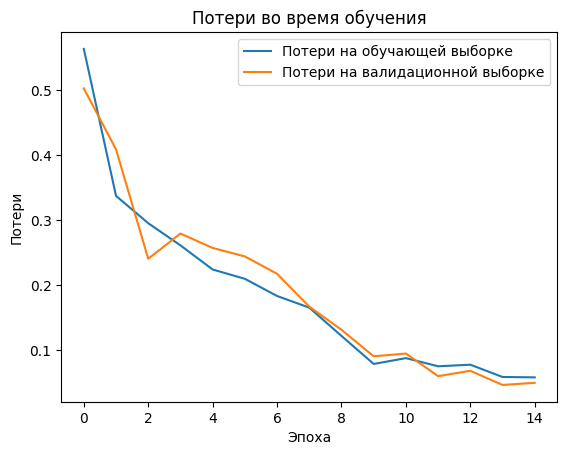

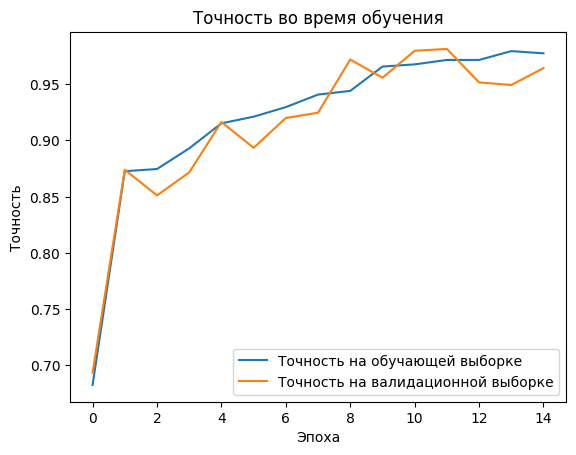

In [31]:
plt.plot(model.history.history['loss'], label='Потери на обучающей выборке')
plt.plot(model.history.history['val_loss'], label='Потери на валидационной выборке')
plt.title('Потери во время обучения')
plt.ylabel('Потери')
plt.xlabel('Эпоха')
plt.legend()
plt.show()

plt.plot(model.history.history['accuracy'], label='Точность на обучающей выборке')
plt.plot(model.history.history['val_accuracy'], label='Точность на валидационной выборке')
plt.title('Точность во время обучения')
plt.ylabel('Точность')
plt.xlabel('Эпоха')
plt.legend()
plt.show()